In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.impute import MissingIndicator
import seaborn as sns
from random import randrange, uniform
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from fancyimpute import KNN


Using TensorFlow backend.


In [2]:
import os
os.chdir("E:/Study Material/Data Science/Learning Data Science edWisor/Projects/Bank Loan Default Case/Python code")

In [3]:
data=pd.read_csv("bank-loan.csv", sep=',')
data_test=data.iloc[700:849
                    ,:]
data=data.iloc[:700,:]

In [6]:
data.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

In [7]:
data['employ']=data['employ'].astype('category')
data['address']=data['address'].astype('category')
data['ed']=data['ed'].astype('category')
data['default']=data['default'].astype('category')

#data['employ']=data['employ'].astype('object')
#data['address']=data['address'].astype('object')
#data['ed']=data['ed'].astype('object')
#data['default']=data['default'].astype('object')

# Missing Value Analysis

In [8]:
data.head(60)


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
5,41,2,5,5,25,10.2,0.392700,2.157300,0.0
6,39,1,20,9,67,30.6,3.833874,16.668126,0.0
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
8,24,1,3,4,19,24.4,1.358348,3.277652,1.0
9,36,1,0,13,25,19.7,2.777700,2.147300,0.0


In [9]:
data=data.replace({'ed':0,'employ':0,'address':0,'income':0,'debtinc':0,'creddebt':0,'othdebt':0},np.nan)

In [10]:
data.dtypes

age            int64
ed          category
employ      category
address     category
income         int64
debtinc      float64
creddebt     float64
othdebt      float64
default     category
dtype: object

In [11]:
data.head(60)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,NaN,28,17.3,1.787436,3.056564,1.0
5,41,2,5,5,25,10.2,0.392700,2.157300,0.0
6,39,1,20,9,67,30.6,3.833874,16.668126,0.0
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
8,24,1,3,4,19,24.4,1.358348,3.277652,1.0
9,36,1,NaN,13,25,19.7,2.777700,2.147300,0.0


In [12]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(data.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(data))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)


In [13]:
data.dtypes 



age            int64
ed          category
employ      category
address     category
income         int64
debtinc      float64
creddebt     float64
othdebt      float64
default     category
dtype: object

In [14]:
data.ed

0      3
1      1
2      1
3      1
4      2
      ..
695    2
696    2
697    1
698    1
699    1
Name: ed, Length: 700, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

In [15]:
#Creating missing value 
#Actual value of Employ at observation 16 = 13
data['employ'].loc[41]=np.nan

In [227]:
    data.head(60)
#Impute with mode
#imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#data=pd.DataFrame(imp.fit_transform(data),columns=data.columns,index=data.index)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,NaN,28,17.3,1.787436,3.056564,1.0
5,41,2,5,5,25,10.2,0.392700,2.157300,0.0
6,39,1,20,9,67,30.6,3.833874,16.668126,0.0
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
8,24,1,3,4,19,24.4,1.358348,3.277652,1.0
9,36,1,NaN,13,25,19.7,2.777700,2.147300,0.0


In [16]:
data.dtypes


age            int64
ed          category
employ      category
address     category
income         int64
debtinc      float64
creddebt     float64
othdebt      float64
default     category
dtype: object

In [17]:
#Impute with KNN

data= pd.DataFrame(KNN(k = 5).fit_transform(data), columns = data.columns)




Imputing row 1/700 with 0 missing, elapsed time: 0.535
Imputing row 101/700 with 0 missing, elapsed time: 0.582
Imputing row 201/700 with 0 missing, elapsed time: 0.585
Imputing row 301/700 with 0 missing, elapsed time: 0.590
Imputing row 401/700 with 1 missing, elapsed time: 0.593
Imputing row 501/700 with 1 missing, elapsed time: 0.597
Imputing row 601/700 with 0 missing, elapsed time: 0.601


In [18]:
data.head(60)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17.000000,12.000000,176.0,9.3,11.359392,5.008608,1.0
1,27.0,1.0,10.000000,6.000000,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1.0,15.000000,14.000000,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1.0,15.000000,14.000000,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2.0,2.000000,2.458910,28.0,17.3,1.787436,3.056564,1.0
5,41.0,2.0,5.000000,5.000000,25.0,10.2,0.392700,2.157300,0.0
6,39.0,1.0,20.000000,9.000000,67.0,30.6,3.833874,16.668126,0.0
7,43.0,1.0,12.000000,11.000000,38.0,3.6,0.128592,1.239408,0.0
8,24.0,1.0,3.000000,4.000000,19.0,24.4,1.358348,3.277652,1.0
9,36.0,1.0,3.550081,13.000000,25.0,19.7,2.777700,2.147300,0.0


In [19]:
catenames= ["ed","address","employ","default"]
for i in catenames:
    data.loc[:,i] = data.loc[:,i].round()
    data.loc[:,i] = data.loc[:,i].astype('category')
    

In [232]:
data.head(60)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2.0,2.0,2.0,28.0,17.3,1.787436,3.056564,1.0
5,41.0,2.0,5.0,5.0,25.0,10.2,0.392700,2.157300,0.0
6,39.0,1.0,20.0,9.0,67.0,30.6,3.833874,16.668126,0.0
7,43.0,1.0,12.0,11.0,38.0,3.6,0.128592,1.239408,0.0
8,24.0,1.0,3.0,4.0,19.0,24.4,1.358348,3.277652,1.0
9,36.0,1.0,4.0,13.0,25.0,19.7,2.777700,2.147300,0.0


In [20]:
data.head(60)


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2.0,2.0,2.0,28.0,17.3,1.787436,3.056564,1.0
5,41.0,2.0,5.0,5.0,25.0,10.2,0.392700,2.157300,0.0
6,39.0,1.0,20.0,9.0,67.0,30.6,3.833874,16.668126,0.0
7,43.0,1.0,12.0,11.0,38.0,3.6,0.128592,1.239408,0.0
8,24.0,1.0,3.0,4.0,19.0,24.4,1.358348,3.277652,1.0
9,36.0,1.0,4.0,13.0,25.0,19.7,2.777700,2.147300,0.0


In [21]:
data.dtypes

age          float64
ed          category
employ      category
address     category
income       float64
debtinc      float64
creddebt     float64
othdebt      float64
default     category
dtype: object

In [22]:
#Converting into correct Datatypes
data['age']=data['age'].astype('int64')
#data['ed']=data['ed'].astype('category')
#data['employ']=data['employ'].astype('category')
#data['address']=data['address'].astype('category')
data['income']=data['income'].astype('int64')
data['debtinc']=data['debtinc'].astype('float64')
data['creddebt']=data['creddebt'].astype('float64')
data['othdebt']=data['othdebt'].astype('float64')
#data['default']=data['default'].astype('category')

In [23]:
data.dtypes

age            int64
ed          category
employ      category
address     category
income         int64
debtinc      float64
creddebt     float64
othdebt      float64
default     category
dtype: object

# Outlier Analysis

In [24]:
df=data.copy()
#data=df.copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d5bb622ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5bbd26cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d5bbd187c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5bbd33f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d5bbd38948>],
 'means': []}

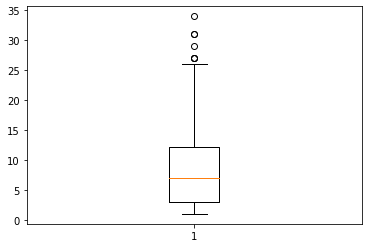

In [25]:
# #Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(data['address'])

In [26]:
#save All Numeric Variables  for Outlier analysis
cnames= ["age", "income", "debtinc", "creddebt", "othdebt"]

In [27]:
# #Detect and delete outliers from data
for i in cnames:
    print(i)
    q75, q25 = np.percentile(data.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
     
    data = data.drop(data[data.loc[:,i] < min].index)
    data = data.drop(data[data.loc[:,i] > max].index)

age
12.5
56.5
income
-22.5
101.5
debtinc
-8.587499999999997
27.912499999999994
creddebt
-1.6383245000000004
3.6348735000000003
othdebt
-1.9320090000000003
5.7620190000000004


In [21]:
#Detect and replace with NA
#for i in cnames:
 #   print(i)
  #  q75, q25 = np.percentile(data.loc[:,i], [75 ,25])
   # iqr = q75 - q25

    #min = q25 - (iqr*1.5)
 #   max = q75 + (iqr*1.5)
 #   print(min)
 #   print(max)

  #  marketing_train.loc[data[data.loc[:,i] < min,:'custAge'] = np.nan
  #  marketing_train.loc[data[data.loc[:,i] > max,:'custAge'] = np.nan

# #Calculate missing value
# missing_val = pd.DataFrame(data.isnull().sum())

# #Impute with KNN
# data = pd.DataFrame(KNN(k = 3).complete(data), columns = data.columns)

In [28]:
data.shape

(560, 9)

# Feature Selection 

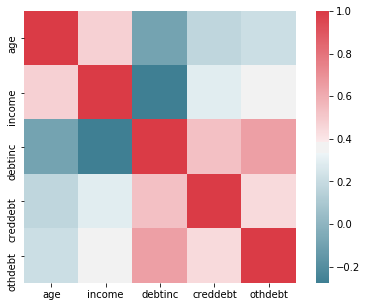

In [29]:
##Correlation analysis
df_corr = data.loc[:,cnames]

#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [30]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["ed", "employ","address"]

#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(data['default'], data[i]))
    print(p)

ed
0.06957152484814944
employ
1.343767437762687e-07
address
0.006199699342377137


In [31]:
data = data.drop(['ed'], axis=1)

# Feature Scaling

In [32]:
df = data.copy()
#data= df.copy()

age
income
debtinc
creddebt
othdebt


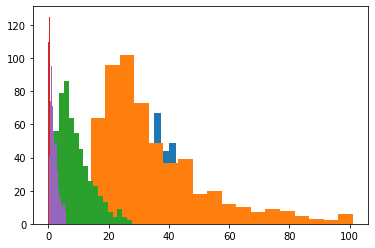

In [33]:
#Checking Normality of variables
%matplotlib inline
for i in cnames:
    print(i)
    plt.hist(data[i], bins='auto')

In [34]:
#Nomalisation
for i in cnames:
    print(i)
    data[i] = (data[i] - (data[i]).min())/((data[i].max()) - (data[i].min()))

age
income
debtinc
creddebt
othdebt


In [35]:
data.head(10)

,age,employ,address,income,debtinc,creddebt,othdebt,default
1,0.200000,10.0,6.0,0.195402,0.619048,0.388171,0.695971,0.0
2,0.571429,15.0,14.0,0.471264,0.186813,0.242697,0.373629,0.0
4,0.114286,2.0,2.0,0.160920,0.619048,0.510394,0.529821,1.0
5,0.600000,5.0,5.0,0.126437,0.358974,0.109511,0.371584,0.0
7,0.657143,12.0,11.0,0.275862,0.117216,0.033599,0.210069,0.0
8,0.114286,3.0,4.0,0.057471,0.879121,0.387063,0.568724,1.0
9,0.457143,4.0,13.0,0.126437,0.706960,0.795022,0.369824,0.0
10,0.200000,2.0,1.0,0.022989,0.047619,0.049097,0.007725,0.0
11,0.142857,4.0,3.0,0.103448,0.175824,0.069172,0.158025,0.0
13,0.485714,6.0,9.0,0.172414,0.582418,0.489833,0.521820,0.0


# Model Deployment

In [36]:
#Logistic Regression 
data_logit=pd.DataFrame(data['default'])

In [37]:
data_logit=data_logit.join(data[cnames])

In [38]:
data_logit.head()

,default,age,income,debtinc,creddebt,othdebt
1,0.0,0.200000,0.195402,0.619048,0.388171,0.695971
2,0.0,0.571429,0.471264,0.186813,0.242697,0.373629
4,1.0,0.114286,0.160920,0.619048,0.510394,0.529821
5,0.0,0.600000,0.126437,0.358974,0.109511,0.371584
7,0.0,0.657143,0.275862,0.117216,0.033599,0.210069


In [39]:
#Creating dummies for categorical variables
cate_names=["employ","address"]
for i in cate_names:
    temp = pd.get_dummies(data[i], prefix = i)
    data_logit = data_logit.join(temp)

In [40]:
data_logit.shape

(560, 67)

In [41]:
Sample_Index = np.random.rand(len(data_logit)) < 0.8

train = data_logit[Sample_Index]
test = data_logit[~Sample_Index]

In [42]:
#select column indexes for independent variables
data_cols = train.columns[1:72]

In [43]:
train.shape

(444, 67)

In [44]:
data_cols


Index(['age', 'income', 'debtinc', 'creddebt', 'othdebt', 'employ_1.0',
       'employ_2.0', 'employ_3.0', 'employ_4.0', 'employ_5.0', 'employ_6.0',
       'employ_7.0', 'employ_8.0', 'employ_9.0', 'employ_10.0', 'employ_11.0',
       'employ_12.0', 'employ_13.0', 'employ_14.0', 'employ_15.0',
       'employ_16.0', 'employ_17.0', 'employ_18.0', 'employ_19.0',
       'employ_20.0', 'employ_21.0', 'employ_22.0', 'employ_23.0',
       'employ_24.0', 'employ_25.0', 'employ_26.0', 'employ_27.0',
       'employ_28.0', 'employ_29.0', 'employ_30.0', 'employ_31.0',
       'address_1.0', 'address_2.0', 'address_3.0', 'address_4.0',
       'address_5.0', 'address_6.0', 'address_7.0', 'address_8.0',
       'address_9.0', 'address_10.0', 'address_11.0', 'address_12.0',
       'address_13.0', 'address_14.0', 'address_15.0', 'address_16.0',
       'address_17.0', 'address_18.0', 'address_19.0', 'address_20.0',
       'address_21.0', 'address_22.0', 'address_23.0', 'address_24.0',
       'address_25.0

In [46]:
train.dtypes

default         category
age              float64
income           float64
debtinc          float64
creddebt         float64
                  ...   
address_26.0       uint8
address_27.0       uint8
address_29.0       uint8
address_31.0       uint8
address_34.0       uint8
Length: 67, dtype: object

In [254]:
#Building Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(train['default'], train[data_cols]).fit()


C:\Users\Dell\Anaconda3\envs\py37\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Dell\Anaconda3\envs\py37\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

# KNN Implementation

In [135]:

from sklearn.model_selection import train_test_split   # sklearn cross validation has been deprecated

In [136]:

#Divide data into train and test
X = data.values[:, 0:7]
Y = data.values[:,7]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [137]:
#X_train=X_train.astype('O')
y_train=y_train.astype(int)
#X_test=X_test.astype('O')
#y_test=y_test.astype('O')


ValueError: invalid literal for int() with base 10: 'Yes'

In [138]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [94]:
#predict test cases
KNN_Predictions = KNN_model.predict(X_test)

In [96]:
#build confusion matrix
CM = pd.crosstab(y_test, KNN_Predictions)

print(CM)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

print(TN)
print(FN)
print(TP)
print(FP)

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
#((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
(FN*100)/(FN+TP)

col_0   0  1
row_0       
0.0    80  7
1.0    18  7
80
18
7
7


72.0

In [104]:
#Accuracy:77.67%
#FNR: 72

SyntaxError: invalid syntax (<ipython-input-104-f029d5911713>, line 1)

In [97]:
KNN_Predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0])

# Naive Bayes

In [98]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [99]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [104]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)

print(CM)
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
#((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
(FN*100)/(FN+TP)

#Accuracy: 70
#FNR: 48

col_0   0   1
row_0        
0.0    66  21
1.0    12  13


48.0

In [ ]:
#Decision Tree

In [111]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 

In [112]:
#replace target categories with Yes or No
data['default'] = data['default'].replace(0, 'No')
data['default'] = data['default'].replace(1, 'Yes')

In [113]:
#Divide data into train and test
X = data.values[:, 0:7]
Y = data.values[:,7]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [122]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)


In [123]:
#predict new test cases
C50_Predictions = C50_model.predict(X_test)

In [124]:
data.columns[0:7]

Index(['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt'], dtype='object')

In [125]:
X_train=pd.DataFrame(X_train[cnames])


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [119]:
C50_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [126]:
#Create dot file to visualise tree  #http://webgraphviz.com/
dotfile = open("pt1.dot", 'w')
df = tree.export_graphviz(C50_model, out_file=dotfile, feature_names = data.columns[0:7])

In [127]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, C50_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Results
#Accuracy: 84.49
#FNR: 63

66.07142857142857

In [ ]:
############Random Forest######

In [128]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)

In [129]:
RF_Predictions = RF_model.predict(X_test)

In [134]:
# Confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, RF_Predictions)
print(CM)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Accuracy: 75.89
#FNR: 64

col_0  No  Yes
row_0         
No     74    6
Yes    23    9


74.10714285714286